In [1]:
%matplotlib inline


Plotting tools in nilearn
==========================

Nilearn comes with a set of plotting functions for easy visualization of
Nifti-like images such as statistical maps mapped onto anatomical images
or onto glass brain representation, anatomical images, functional/EPI images,
region specific mask images.

See `plotting` for more details.



Retrieve data from nilearn provided (general-purpose) datasets
---------------------------------------------------------------



In [2]:
from nilearn import datasets

# haxby dataset to have EPI images and masks
haxby_dataset = datasets.fetch_haxby()

# print basic information on the dataset
print('First subject anatomical nifti image (3D) is at: %s' %
      haxby_dataset.anat[0])
print('First subject functional nifti image (4D) is at: %s' %
      haxby_dataset.func[0])  # 4D data

haxby_anat_filename = haxby_dataset.anat[0]
haxby_mask_filename = haxby_dataset.mask_vt[0]
haxby_func_filename = haxby_dataset.func[0]

# one motor contrast map from NeuroVault
motor_images = datasets.fetch_neurovault_motor_task()
stat_img = motor_images.images[0]


Dataset created in /Users/camaumet/nilearn_data/haxby2001



Downloaded 2969 of 2969 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 408 of 408 bytes (100.0%,    0.0s remaining) ...done. (0 seconds, 0 min)


Downloaded 291168628 of 291168628 bytes (100.0%,    0.0s remaining) ...done. (90 seconds, 1 min)
Extracting data from /Users/camaumet/nilearn_data/haxby2001/f33ff337e914bf7fded743c7107979f9/subj2-2010.01.14.tar.gz..... done.


First subject anatomical nifti image (3D) is at: /Users/camaumet/nilearn_data/haxby2001/subj2/anat.nii.gz
First subject functional nifti image (4D) is at: /Users/camaumet/nilearn_data/haxby2001/subj2/bold.nii.gz

Dataset created in /Users/camaumet/nilearn_data/neurovault



Plotting statistical maps with function `plot_stat_map`
--------------------------------------------------------



/anaconda3/envs/narps/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/anaconda3/envs/narps/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/anaconda3/envs/narps/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


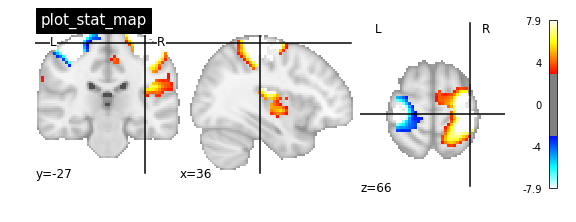

In [3]:
from nilearn import plotting

# Visualizing t-map image on EPI template with manual
# positioning of coordinates using cut_coords given as a list
plotting.plot_stat_map(stat_img,
                       threshold=3, title="plot_stat_map",
                       cut_coords=[36, -27, 66])

Making interactive visualizations with function `view_img`
----------------------------------------------------------
An alternative to :func:`nilearn.plotting.plot_stat_map` is to use
:func:`nilearn.plotting.view_img` that gives more interactive
visualizations in a web browser. See `interactive-stat-map-plotting`
for more details.



In [4]:
view = plotting.view_img(stat_img, threshold=3)

# uncomment this to open the plot in a web browser:
# view.open_in_browser()

/anaconda3/envs/narps/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


In a Jupyter notebook, if ``view`` is the output of a cell, it will
be displayed below the cell



In [5]:
view

Plotting statistical maps in a glass brain with function `plot_glass_brain`
---------------------------------------------------------------------------

Now, the t-map image is mapped on glass brain representation where glass
brain is always a fixed background template



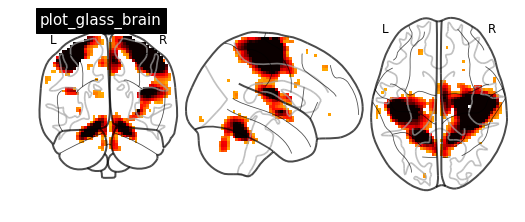

In [6]:
plotting.plot_glass_brain(stat_img, title='plot_glass_brain',
                          threshold=3)

Plotting anatomical images with function `plot_anat`
-----------------------------------------------------

Visualizing anatomical image of haxby dataset



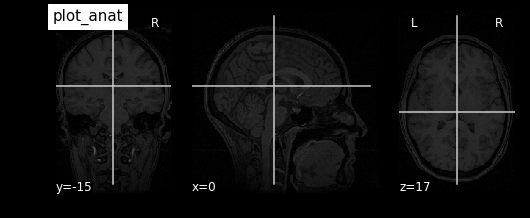

In [7]:
plotting.plot_anat(haxby_anat_filename, title="plot_anat")

Plotting ROIs (here the mask) with function `plot_roi`
-------------------------------------------------------

Visualizing ventral temporal region image from haxby dataset overlayed on
subject specific anatomical image with coordinates positioned automatically on
region of interest (roi)



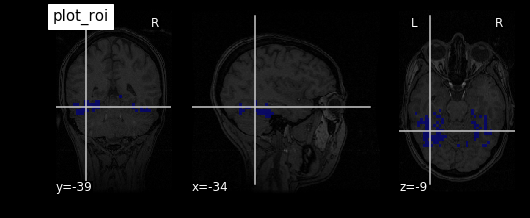

In [8]:
plotting.plot_roi(haxby_mask_filename, bg_img=haxby_anat_filename,
                  title="plot_roi")

Plotting EPI image with function `plot_epi`
---------------------------------------------



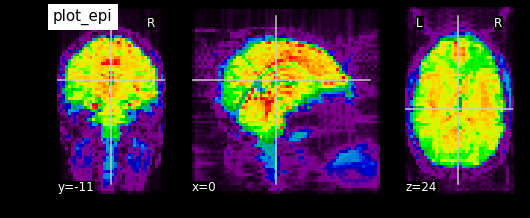

In [9]:
# Import image processing tool
from nilearn import image

# Compute the voxel_wise mean of functional images across time.
# Basically reducing the functional image from 4D to 3D
mean_haxby_img = image.mean_img(haxby_func_filename)

# Visualizing mean image (3D)
plotting.plot_epi(mean_haxby_img, title="plot_epi")

A call to plotting.show is needed to display the plots when running
in script mode (ie outside IPython)



In [10]:
plotting.show()